# Distribution plots


In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


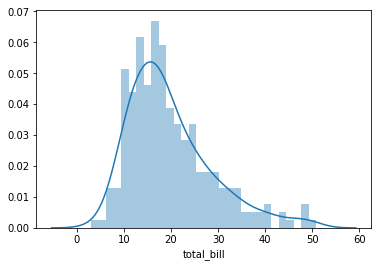

In [8]:
# Distribution plot

sns.distplot(tips['total_bill'], bins=30)

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


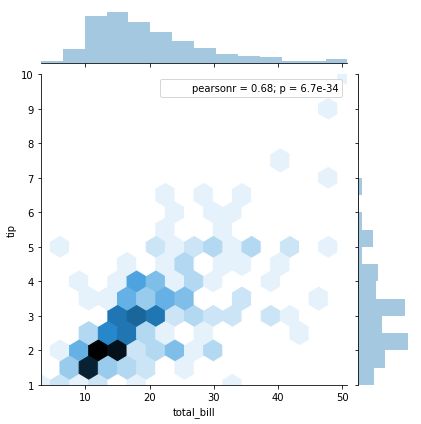

In [12]:
# Joint plot : combine 2 distribution plot

sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


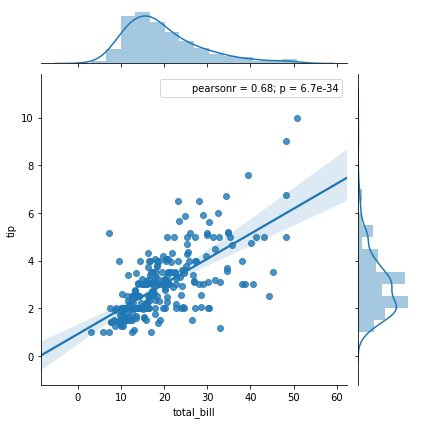

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

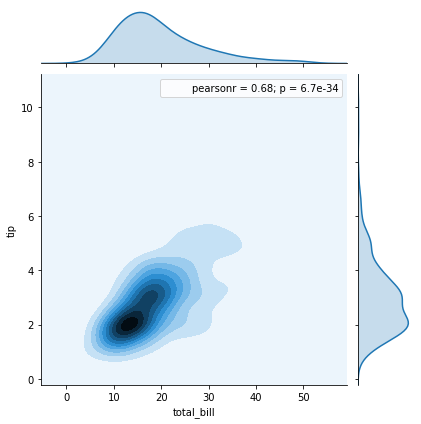

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


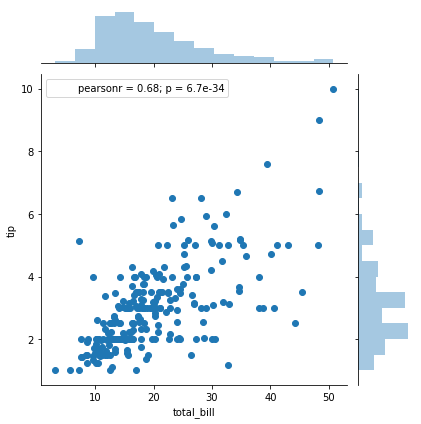

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips)

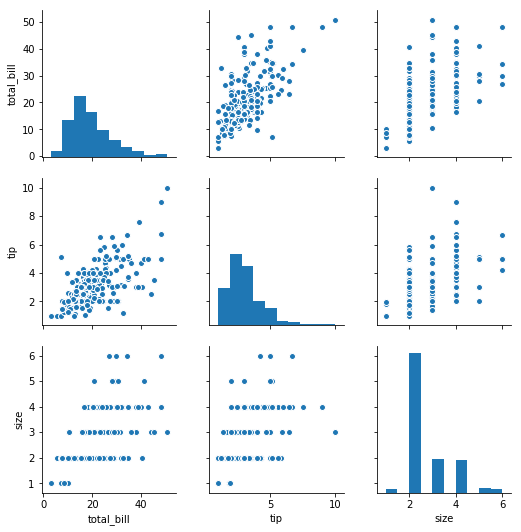

In [17]:
# pairplot -> pairwise relationship for every numerical values

sns.pairplot(tips)

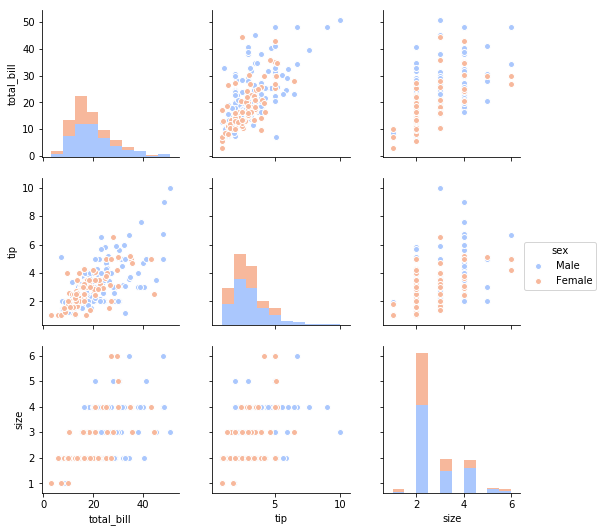

In [20]:
# hue parameter for categorical columns
sns.pairplot(tips, hue='sex', palette='coolwarm')

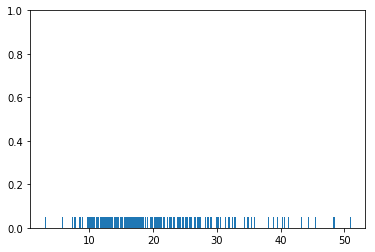

In [22]:
# rugplot() -> kinda like dist plot but without count histogram, only dash for each value

sns.rugplot(tips['total_bill'])

In [24]:
# the kde is based on the rugplot
# kde stands for kernel density estimation
# it's the sum of gaussian distribution (~)

(0, 1)

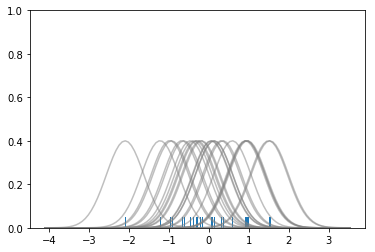

In [25]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Normal distributions are centered above dashes from rugplot

Text(0.5,0.98,'Sum of the Basis Functions')

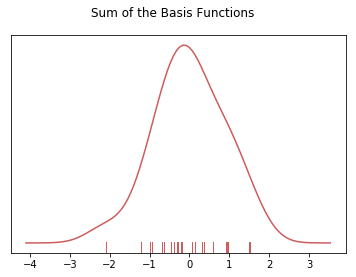

In [26]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

The sum of normal distribution create the kde 

In [27]:
# distplot(column, ?kde=False)
# jointplot(x=column1,y=column2, data)
# pairplot(data, hue=categorical category, palette=style)
# rugplot(column) -> used to create kernel density estimation

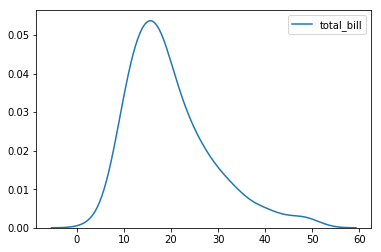

In [28]:
sns.kdeplot(tips['total_bill'])

# Categorical Plots

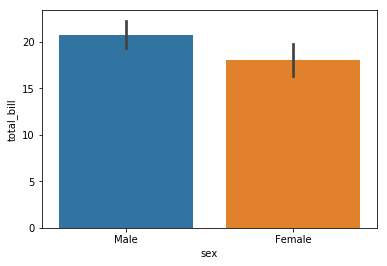

In [29]:
sns.barplot(x='sex',y='total_bill',data=tips)

In [31]:
# Average total bill by gender
import numpy as np

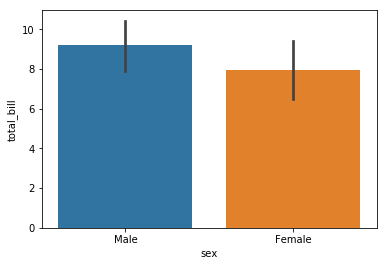

In [32]:
# estimator argument

sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

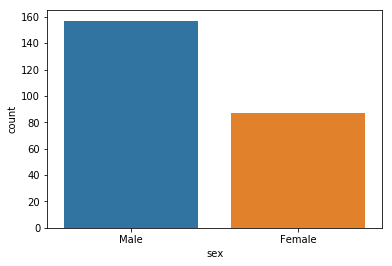

In [33]:
# countplot -> estimator count the number of occurencies
sns.countplot(x='sex',data=tips)

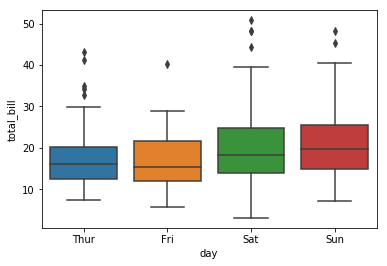

In [34]:
sns.boxplot(x='day',y='total_bill',data=tips)

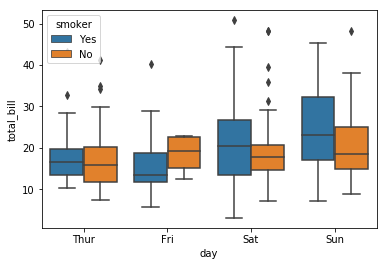

In [35]:
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')

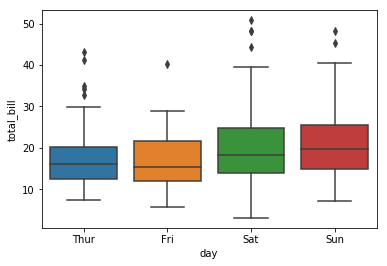

In [36]:
sns.boxplot(x='day',y='total_bill',data=tips)

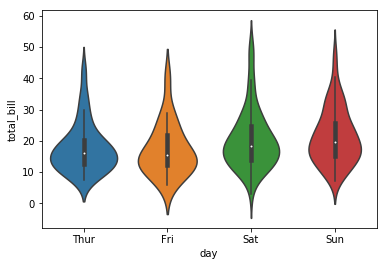

In [37]:
sns.violinplot(x='day',y='total_bill',data=tips)

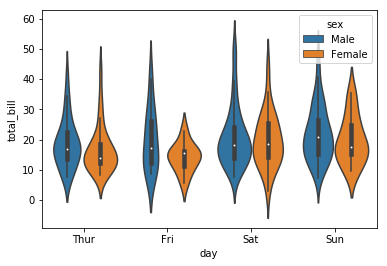

In [38]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex')

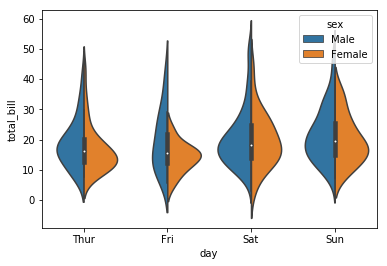

In [39]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)

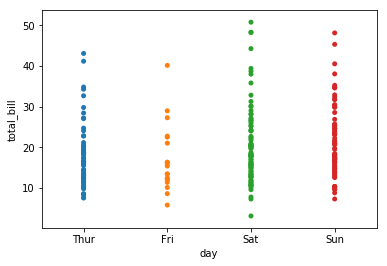

In [40]:
sns.stripplot(x='day',y='total_bill',data=tips)

/home/allan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


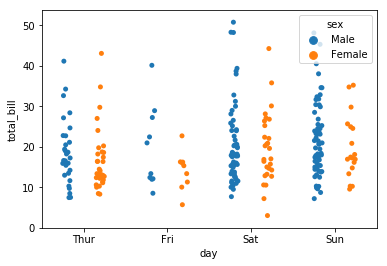

In [43]:
sns.stripplot(x='day',y='total_bill',data=tips, jitter=True, hue='sex', split=True)

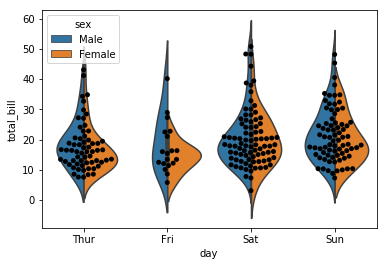

In [49]:
# swarmplot()
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black')

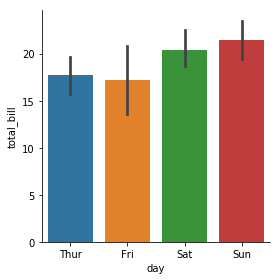

In [50]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='bar')

# Matrix Plots

In [51]:
flights = sns.load_dataset('flights')

In [52]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [53]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
tc =tips.corr()

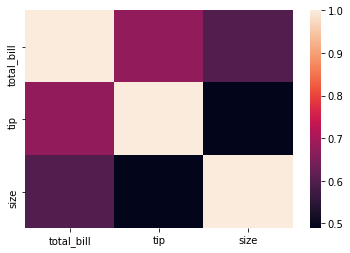

In [56]:
sns.heatmap(tc)

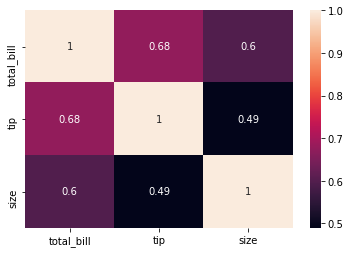

In [58]:
sns.heatmap(tc, annot=True) #cmap for color

In [61]:
fp = flights.pivot_table(index='month', columns='year',values='passengers')

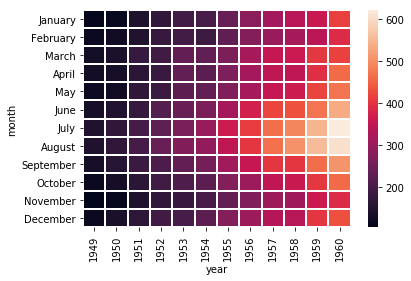

In [63]:
sns.heatmap(fp,linecolor='white',linewidths=1)

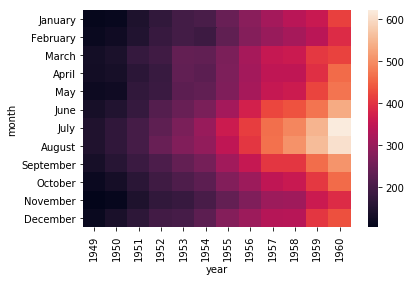

In [64]:
sns.heatmap(fp)

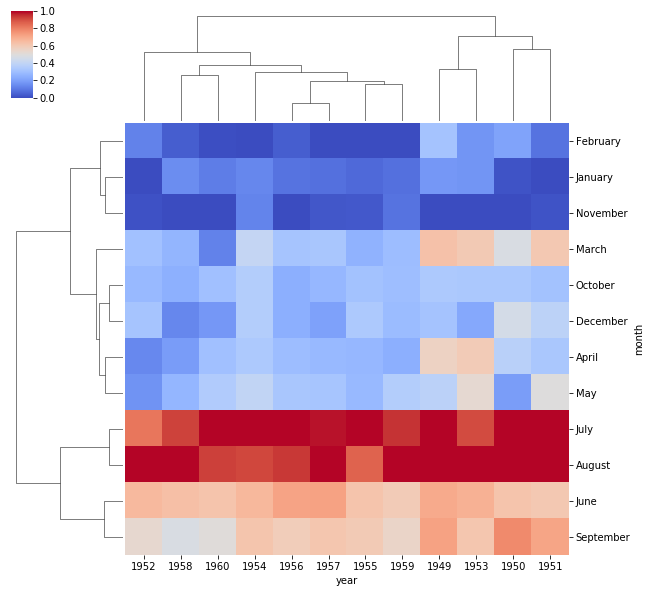

In [67]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1)

# Grids

In [68]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

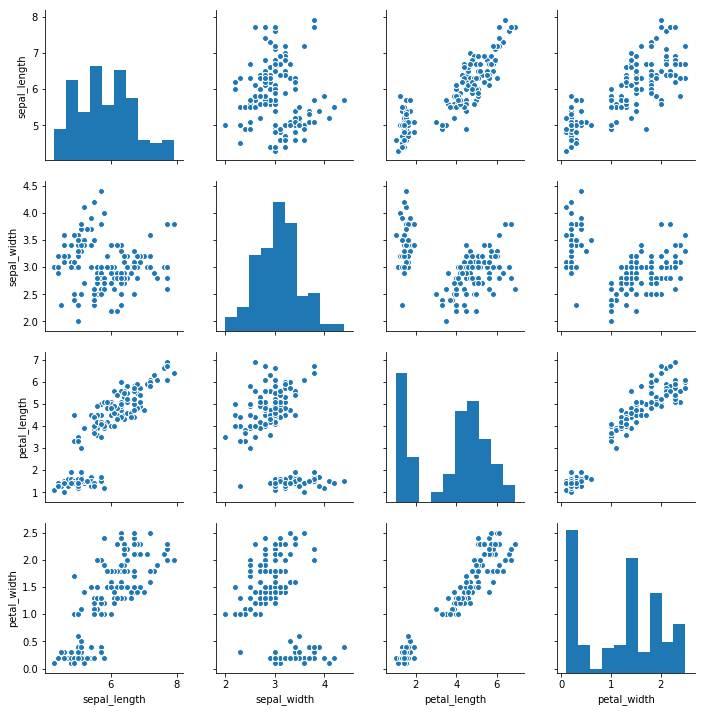

In [70]:
sns.pairplot(iris)

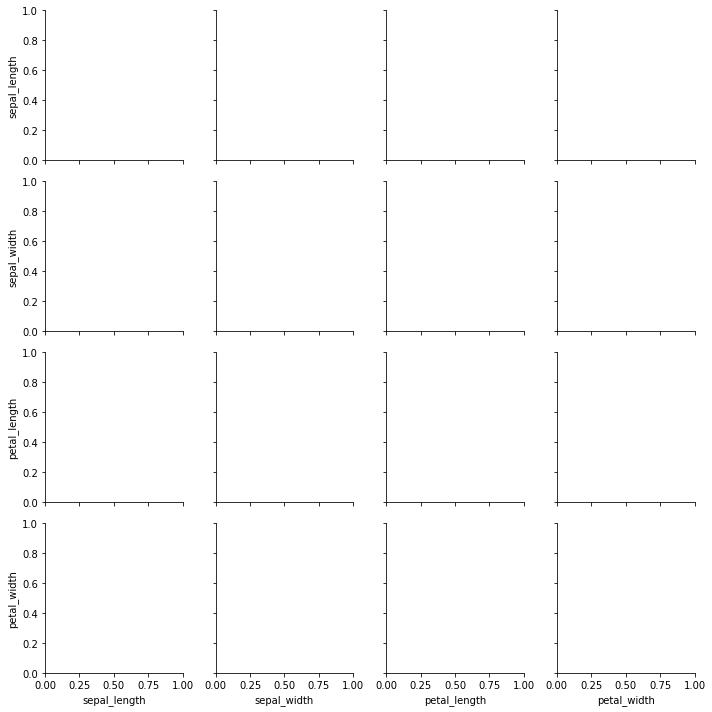

In [71]:
sns.PairGrid(iris)

/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/allan/anaconda3/lib/python3.6/site

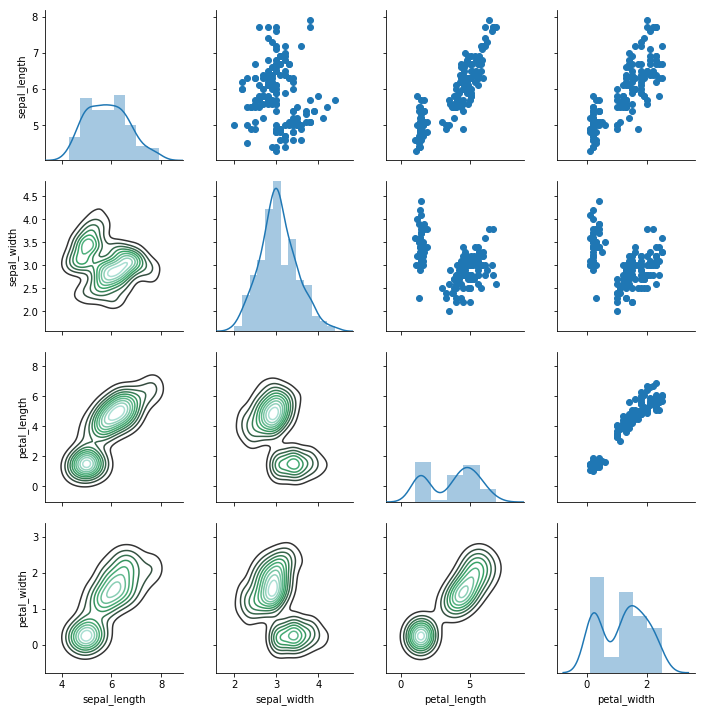

In [74]:
g = sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot)

In [75]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


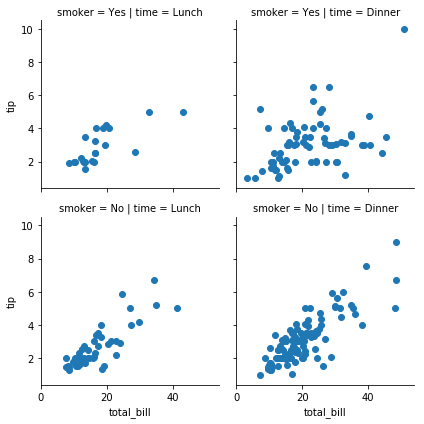

In [79]:
g = sns.FacetGrid(data=tips,col='time',row='smoker')
g.map(plt.scatter, 'total_bill', 'tip')

# Regression Plots

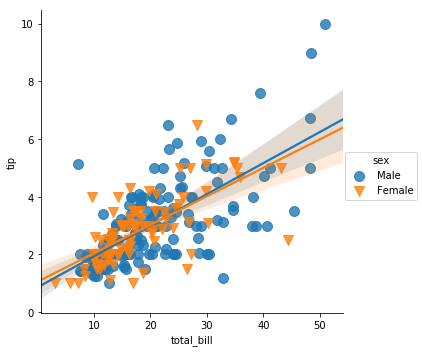

In [82]:
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':100})

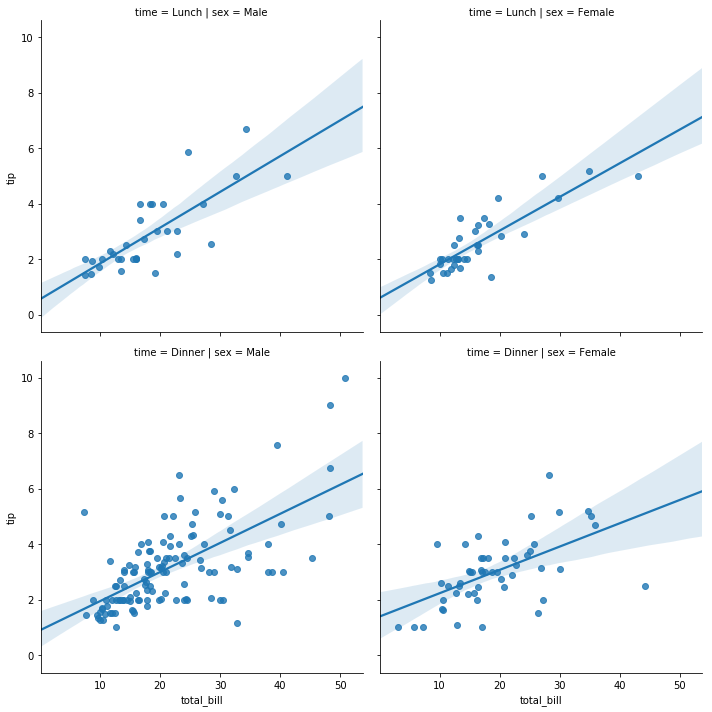

In [85]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='sex', row='time')

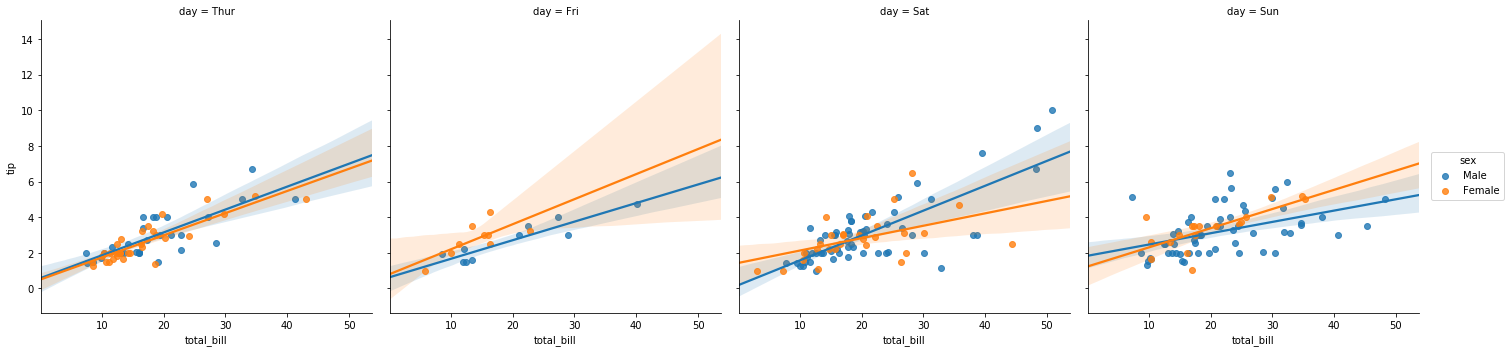

In [86]:
sns.lmplot(x='total_bill',y='tip', data=tips, col='day', hue='sex')

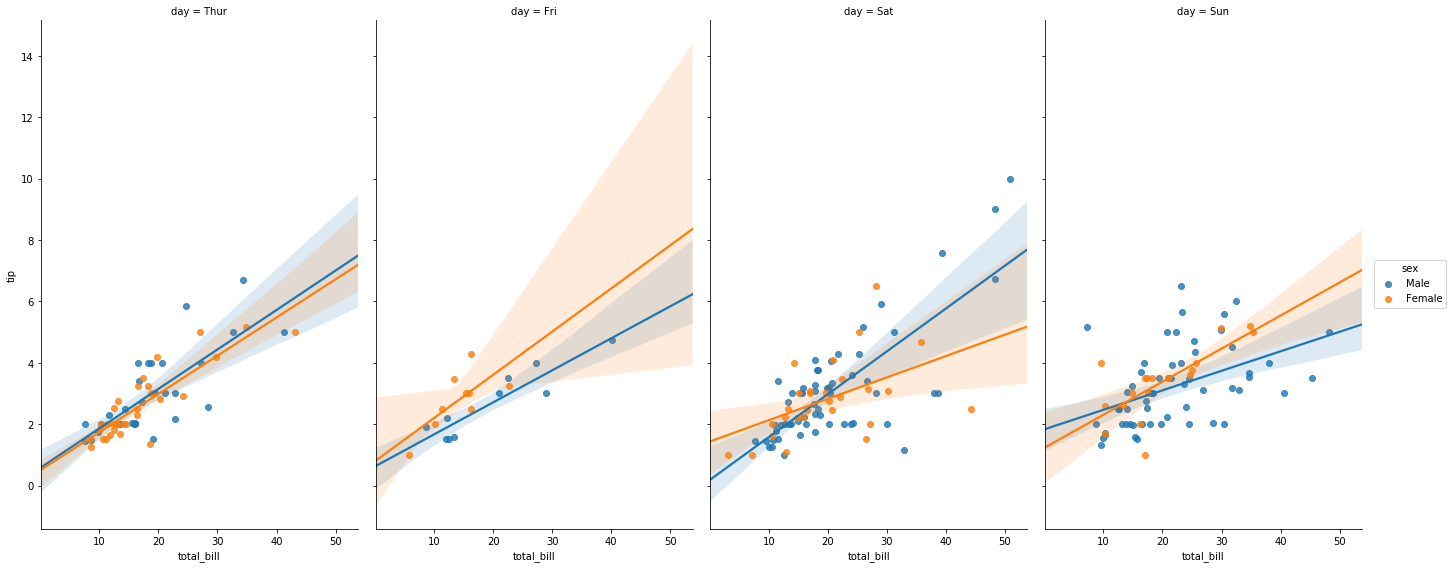

In [87]:
# Change size and aspect ratio 
sns.lmplot(x='total_bill',y='tip', data=tips, col='day', hue='sex', 
          aspect=0.6,size=8)

## Style and colors

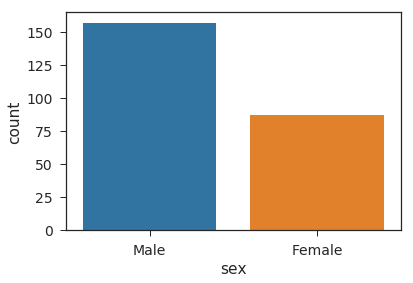

In [100]:
# sns.set_style('ticks')
# plt.figure(figsize=(12,3))
sns.set_context('notebook', font_scale = 1.4)
sns.countplot(x='sex', data = tips)
# sns.despine()

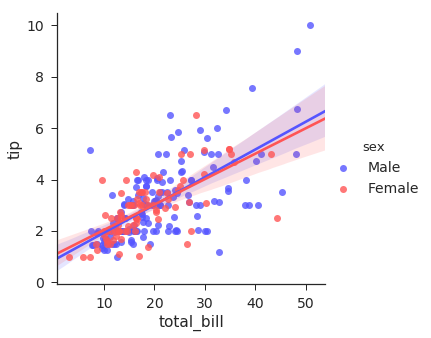

In [103]:
sns.lmplot(x='total_bill', y ='tip',data=tips, hue = 'sex',
          palette = 'seismic')